In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### link of dataset : https://www.kaggle.com/competitions/titanic/data

### EDA

In [2]:
df = pd.read_csv("C:\\Users\\sanjay\\Downloads\\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = df.drop(columns=['PassengerId'])

In [4]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 11)

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Survived'].value_counts().index

Index([0, 1], dtype='int64', name='Survived')

In [10]:
df["survivor"] = df['Survived'].map({0:'no',1:'yes'})


px.bar(x=df['survivor'].value_counts().index,
       y=df['survivor'].value_counts().values,height=400,width=500,text_auto=True)


# around 550 are dead and only 342 are survived

In [11]:
px.pie(names=df['Pclass'].value_counts().index,
       values=df['Pclass'].value_counts().values,height=400,width=500,hover_name=df['Pclass'].unique())
# most of the people are travelling from pclass 3 after that pclass 1

In [12]:
px.bar(x=df['Sex'].value_counts().index,
       y=df['Sex'].value_counts().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["red"])
# in titanic there were most no. of males compared to female

In [13]:

px.pie(names=df['SibSp'].value_counts().index,
       values=df['SibSp'].value_counts().values,height=400,width=500)
# most of the people are travelling alone where as there are some people who is travelling with 8 siblings

In [14]:

px.pie(names=df['Parch'].value_counts().index,
       values=df['Parch'].value_counts().values,height=400,width=500)
# it show many people are travelling withoout there parents or children

In [15]:

px.bar(x=df['Embarked'].value_counts().index,
       y=df['Embarked'].value_counts().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["blue"])
# C = Cherbourg, Q = Queenstown, S = Southampton
# it shows most of the people are embarked from Southampton

<Axes: xlabel='Age', ylabel='Count'>

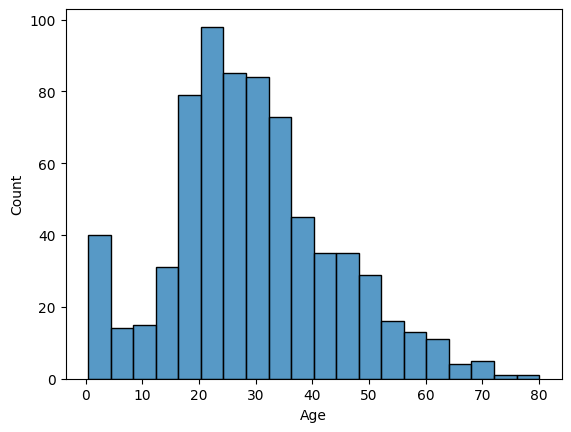

In [16]:
sns.histplot(df,x='Age')
# most of travellers are from age 20 to 50

## Bivariate analysis

In [17]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survivor
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,no
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,yes
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,no
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,yes


In [18]:
# sns.countplot(data=df,x="Sex",hue='Survived')
px.histogram(df, x="Sex", color="Survived",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["orange","blue"])
# most of male are died and most of feamle survived

In [19]:
# sns.countplot(data=df,x="Embarked",hue='Survived')
px.histogram(df, x="Embarked", color="Survived",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["purple","blue"])
# most of people are are died and survived who are embarked from S

In [20]:
pd.crosstab(index=df['Embarked'],columns=df['Survived'],margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [21]:
427/644

0.6630434782608695

In [22]:
px.histogram(df, x="Pclass", color="Sex",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["red","yellow"])
# highest number of males are travelling in Pclass 3

In [23]:
px.histogram(df, x="Pclass", color="survivor",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["red","yellow"])
# 

<Axes: xlabel='Age', ylabel='Density'>

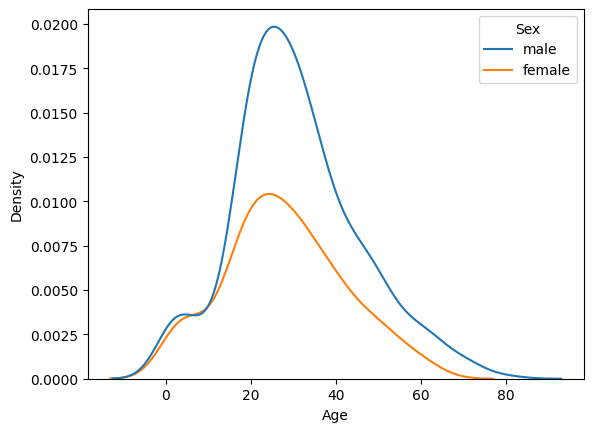

In [24]:
sns.kdeplot(data=df,x='Age',hue='Sex')

In [25]:
# 

px.histogram(df, x="Embarked", color="Pclass",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["orange","blue","green"])
# most people are embarked from S in which most of them are travelling in Pclass 3 whereas the people who are embarked from C most of them are travelling in pclass 1

In [26]:
df['Alone'] = df['SibSp'] + df['Parch']

In [27]:
df['Alone'].value_counts()

Alone
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [28]:
def extract_with_family(num):
    if num == 0:
        return "alone"
    else:
        return "with family"

In [29]:
df['Alone'] = df['Alone'].apply(extract_with_family)

In [30]:

px.histogram(df, x="Alone", color="Survived",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["red","yellow"])
# most of the people who are travelling alone are died

In [31]:

px.histogram(df, x="Alone", color="Sex",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["red","yellow"])
# males are died more who are alone

In [32]:
df[df['Survived'] ==0]['Sex'].value_counts()

Sex
male      468
female     81
Name: count, dtype: int64

In [33]:
px.bar(x=df[df['Survived'] ==0]['Sex'].value_counts().index,
       y=df[df['Survived'] ==0]['Sex'].value_counts().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["red"])

In [34]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survivor,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,with family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes,with family
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes,with family
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,no,alone
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,yes,alone
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,no,with family
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,yes,alone


In [35]:
df[(df['Pclass']==3) & (df['Alone']=='alone')]['Sex'].value_counts()

Sex
male      264
female     60
Name: count, dtype: int64

In [36]:
px.bar(x=df[(df['Pclass']==3) & (df['Alone']=='alone')]['Sex'].value_counts().index,
       y=df[(df['Pclass']==3) & (df['Alone']=='alone')]['Sex'].value_counts().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["blue"])

In [37]:
px.bar(x=df[(df['Alone']=='alone') & (df['Survived']==0)]['Sex'].value_counts().index,
       y=df[(df['Alone']=='alone') & (df['Survived']==0)]['Sex'].value_counts().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["orange"])
# people who are alone and died are 374 in which 347 are males

In [38]:
df.groupby("Survived")['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [39]:
px.bar(x=df.groupby("survivor")['Fare'].mean().index,
       y=df.groupby("survivor")['Fare'].mean().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["blue"])
# mean price of ticket of persons who survived and dead

In [40]:
px.bar(x=df.groupby("Pclass")['Fare'].mean().index,
       y=df.groupby("Pclass")['Fare'].mean().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["green"])
# mean price of class

In [41]:
px.histogram(df, x="Pclass", color="survivor",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["red","green"])
# most of people are survived from pclass 1 and most people are died from pclass 3

In [42]:
def extract_age_group(value):
    if value<=12:
        return "child"
    elif value>12 and value<=18:
        return "teenage"
    elif value >18 and value <60:
        return "Adult"
    else:
        return "senior"

In [43]:
df['Age_grop'] = df['Age'].apply(extract_age_group)

In [44]:
px.histogram(df, x="Age_grop", color="Sex",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["red","green"])

In [45]:
px.histogram(df, x="Age_grop", color="survivor",barmode='group',height=400,width=500,text_auto=True,
             color_discrete_sequence=["red","green"])

In [46]:
px.bar(x=df[(df['Age_grop']=='Adult') & (df['Survived']==0)]['Sex'].value_counts().index,
       y=df[(df['Age_grop']=='Adult') & (df['Survived']==0)]['Sex'].value_counts().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["orange"])

In [47]:
px.bar(x=df[(df['Age_grop']=='senior') & (df['Survived']==0)]['Sex'].value_counts().index,
       y=df[(df['Age_grop']=='senior') & (df['Survived']==0)]['Sex'].value_counts().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["orange"])

In [48]:
px.bar(x=df[(df['Age_grop']=='teenage') & (df['Survived']==0)]['Sex'].value_counts().index,
       y=df[(df['Age_grop']=='teenage') & (df['Survived']==0)]['Sex'].value_counts().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["orange"])

In [49]:
px.bar(x=df[(df['Age_grop']=='child') & (df['Survived']==0)]['Sex'].value_counts().index,
       y=df[(df['Age_grop']=='child') & (df['Survived']==0)]['Sex'].value_counts().values,height=400,width=500,text_auto=True,
       color_discrete_sequence=["orange"])

### imputation

In [68]:
df['Age'].isna().sum()

177

In [73]:
df['Age'] = df['Age'].fillna(value=df['Age'].mean()).astype('int')

In [77]:
df['Fare'].isna().sum()

0

In [80]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
survivor      0
Alone         0
Age_grop      0
dtype: int64

In [84]:
df['Embarked'] = df['Embarked'].fillna(value=df['Embarked'].mode()[0])

### statistical analysis for feature selection

In [108]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survivor,Alone,Age_grop
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,no,with family,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,yes,with family,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,alone,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,yes,with family,Adult
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,no,alone,Adult


In [104]:
   
from scipy.stats import chi2_contingency

### hypothesis for chi square
H0: there is no relation between variable

H1: there is a relation between variable

In [105]:
# contingency table
observed_frequencies = pd.crosstab(index=df['Pclass'],columns=df['Survived'],margins=True)
observed_frequencies

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [107]:
chi2_stat, p_val, dof, expected_freq = chi2_contingency(observed_frequencies)
if p_val<0.05:
    print(f"we reject the null hypothesis and concluded that there is a relation between Pclass and survived")
else:
    print("there is no relation between pclass and survived")

we reject the null hypothesis and concluded that there is a relation between Pclass and survived


In [109]:
observed_frequencies = pd.crosstab(index=df['Sex'],columns=df['Survived'],margins=True)
chi2_stat, p_val, dof, expected_freq = chi2_contingency(observed_frequencies)
if p_val<0.05:
    print(f"we reject the null hypothesis and concluded that there is a relation between Sex and survived")
else:
    print("there is no relation between pclass and survived")

we reject the null hypothesis and concluded that there is a relation between Sex and survived


In [111]:
observed_frequencies = pd.crosstab(index=df['SibSp'],columns=df['Survived'],margins=True)
chi2_stat, p_val, dof, expected_freq = chi2_contingency(observed_frequencies)
if p_val<0.05:
    print(f"we reject the null hypothesis and concluded that there is a relation between SibSp and survived")
else:
    print("there is no relation between pclass and survived")

we reject the null hypothesis and concluded that there is a relation between SibSp and survived


In [112]:
observed_frequencies = pd.crosstab(index=df['Parch'],columns=df['Survived'],margins=True)
chi2_stat, p_val, dof, expected_freq = chi2_contingency(observed_frequencies)
if p_val<0.05:
    print(f"we reject the null hypothesis and concluded that there is a relation between Parch and survived")
else:
    print("there is no relation between pclass and survived")

we reject the null hypothesis and concluded that there is a relation between Parch and survived


In [113]:
observed_frequencies = pd.crosstab(index=df['Embarked'],columns=df['Survived'],margins=True)
chi2_stat, p_val, dof, expected_freq = chi2_contingency(observed_frequencies)
if p_val<0.05:
    print(f"we reject the null hypothesis and concluded that there is a relation between Embarked and survived")
else:
    print("there is no relation between pclass and survived")

we reject the null hypothesis and concluded that there is a relation between Embarked and survived


In [114]:
observed_frequencies = pd.crosstab(index=df['Age_grop'],columns=df['Survived'],margins=True)
chi2_stat, p_val, dof, expected_freq = chi2_contingency(observed_frequencies)
if p_val<0.05:
    print(f"we reject the null hypothesis and concluded that there is a relation between Age_grop and survived")
else:
    print("there is no relation between pclass and survived")

we reject the null hypothesis and concluded that there is a relation between Age_grop and survived


In [117]:
observed_frequencies = pd.crosstab(index=df['Alone'],columns=df['Survived'],margins=True)
chi2_stat, p_val, dof, expected_freq = chi2_contingency(observed_frequencies)
print(p_val)
if p_val<0.05:
    print(f"we reject the null hypothesis and concluded that there is a relation between Alone and survived")
else:
    print("there is no relation between pclass and survived")

1.9340079186274333e-07
we reject the null hypothesis and concluded that there is a relation between Alone and survived


In [202]:
X = df.drop(columns=['Name','Ticket','Cabin','survivor','Survived','Age_grop'])
y = df['Survived']

### model building

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder

In [203]:
X_encoded = pd.get_dummies(X, columns=['Sex','Embarked','Alone'])

In [204]:
X_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Alone_alone,Alone_with family
0,3,22,1,0,7.2500,False,True,False,False,True,False,True
1,1,38,1,0,71.2833,True,False,True,False,False,False,True
2,3,26,0,0,7.9250,True,False,False,False,True,True,False
3,1,35,1,0,53.1000,True,False,False,False,True,False,True
4,3,35,0,0,8.0500,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,False,True,False,False,True,True,False
887,1,19,0,0,30.0000,True,False,False,False,True,True,False
888,3,29,1,2,23.4500,True,False,False,False,True,False,True
889,1,26,0,0,30.0000,False,True,True,False,False,True,False


In [205]:
scaler = StandardScaler()
new_X = scaler.fit_transform(X_encoded)

In [168]:
from sklearn.model_selection import cross_val_score

In [206]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)

# Apply k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(model, new_X, y, cv=k)
scores.mean()

0.7912685958194714

In [210]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

# Apply k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(model, new_X, y, cv=k)
scores.mean()

0.8036155922415416

In [222]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')

# Apply k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(model, new_X, y, cv=k)
scores.mean()

0.8316364321134895

In [228]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,bootstrap=True)

# Apply k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(model, new_X, y, cv=k)
scores.mean()

0.810369719414977

In [232]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Apply k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(model, new_X, y, cv=k)
scores.mean()

0.7811813445483647